## Introduction to Simulations

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [70]:
ann_mean = 1.05
ann_std = 0.67
td_per_year = 259

In [71]:
daily_mean = ann_mean / td_per_year
daily_mean

0.004054054054054054

In [72]:
daily_std = ann_std / np.sqrt(td_per_year)
daily_std

0.04163177432208041

__Returns follow a random process__. It can get better/worse than the average/expected performance (random noise). 

### One simulation over a 1-year period

In [73]:
np.random.seed(123) # for reproducibility
returns = np.random.normal(loc = daily_mean, scale = daily_std,
                           size = td_per_year) # normal distribution (simplified)

In [75]:
returns = np.insert(returns, 0, 0)
returns

array([ 0.00000000e+00,  0.00000000e+00, -4.11426742e-02,  4.55753146e-02,
        1.58349510e-02, -5.86556675e-02, -2.00341011e-02,  7.28062873e-02,
       -9.69729086e-02, -1.38023397e-02,  5.67572267e-02, -3.20298868e-02,
       -2.42091810e-02,  1.11151633e-04,  6.61432504e-02, -2.25445697e-02,
       -1.44297027e-02, -1.40287602e-02,  9.58908374e-02,  9.50938390e-02,
        4.58545993e-02,  2.01316791e-02,  3.47520162e-02,  6.61158734e-02,
       -3.49063704e-02,  5.30059035e-02, -4.81472229e-02, -2.24966726e-02,
        4.18184529e-02, -5.54244584e-02, -1.77725529e-03, -3.18223313e-02,
       -6.58783389e-03, -1.12456176e-01, -6.96980124e-02, -2.50830770e-02,
        4.26659607e-02, -3.17470751e-03,  4.17253458e-03,  3.27059866e-02,
       -3.25626045e-02,  1.58619628e-02, -2.94747831e-02, -6.78718924e-02,
       -1.22197979e-02,  2.79426102e-02,  1.81501170e-02,  3.56152958e-03,
        1.03652465e-01,  2.12443199e-02,  4.48005706e-02,  9.72319324e-02,
       -4.98210141e-02, -

In [76]:
len(returns)

261

In [77]:
creturns = np.exp(returns.cumsum())
creturns

array([1.        , 1.        , 0.9596922 , 1.00444248, 1.02047437,
       0.96233941, 0.94325164, 1.01448806, 0.92072967, 0.90810875,
       0.96114124, 0.93084379, 0.90857942, 0.90868041, 0.97081575,
       0.949174  , 0.93557604, 0.92254271, 1.0153864 , 1.11668343,
       1.16908064, 1.1928547 , 1.23503753, 1.31945297, 1.27419023,
       1.34355189, 1.28039618, 1.25191311, 1.30537627, 1.23499493,
       1.23280198, 1.19418898, 1.18634772, 1.06016364, 0.98878858,
       0.96429519, 1.00632808, 1.00313835, 1.00733272, 1.04082322,
       1.00747717, 1.02358515, 0.99385549, 0.92863885, 0.91736013,
       0.94335506, 0.96063339, 0.96406081, 1.06935061, 1.09231127,
       1.14236018, 1.25901338, 1.19782495, 1.15178721, 1.2435407 ,
       1.20778971, 1.21419563, 1.27462676, 1.32815285, 1.43462317,
       1.53299386, 1.60929688, 1.56468133, 1.62389531, 1.65196507,
       1.56957487, 1.67173754, 1.73589698, 1.74625267, 1.73641419,
       1.65862481, 1.67925362, 1.71927971, 1.66755257, 1.75733

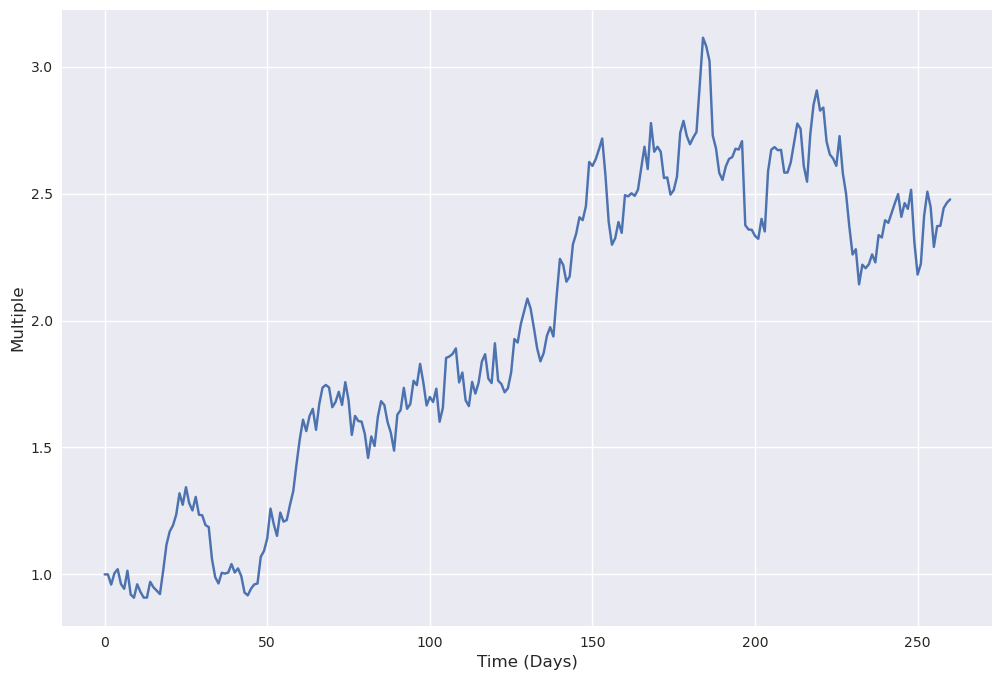

In [78]:
plt.figure(figsize = (12, 8))
plt.plot(creturns)
plt.xlabel("Time (Days)", fontsize = 12)
plt.ylabel("Multiple",  fontsize = 12)
plt.show()

In [79]:
np.mean(returns) * td_per_year

0.9001362962788992

In [80]:
np.std(returns) * np.sqrt(td_per_year)

0.6780367499154415

One simulation is not enough to understand how good or how bad the strategy can be.

We need to run multiple simulations.

### Many simulations (each over a 1-year period)

In [82]:
sims = 1000

In [83]:
np.random.seed(123)
returns = np.random.normal(loc = daily_mean, scale = daily_std, size = td_per_year * sims).reshape(td_per_year, sims)
returns.shape

(259, 1000)

In [84]:
returns

array([[-0.04114267,  0.04557531,  0.01583495, ..., -0.03380284,
         0.02363197, -0.04221677],
       [-0.02712096,  0.02768403,  0.03395194, ..., -0.01090411,
        -0.06296041,  0.004619  ],
       [-0.06981002, -0.04596141,  0.04969317, ...,  0.08900086,
         0.04634848, -0.06396345],
       ...,
       [ 0.03950395,  0.03534108,  0.0702441 , ..., -0.03464241,
        -0.02268064, -0.06339479],
       [-0.1057529 ,  0.02532939,  0.01398934, ..., -0.01974085,
         0.04955439, -0.02298456],
       [ 0.04087776, -0.05421596, -0.02584539, ..., -0.01003307,
        -0.01759928,  0.05507618]])

In [85]:
returns = np.insert(returns, 0, 0, axis = 0)
returns

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04114267,  0.04557531,  0.01583495, ..., -0.03380284,
         0.02363197, -0.04221677],
       [-0.02712096,  0.02768403,  0.03395194, ..., -0.01090411,
        -0.06296041,  0.004619  ],
       ...,
       [ 0.03950395,  0.03534108,  0.0702441 , ..., -0.03464241,
        -0.02268064, -0.06339479],
       [-0.1057529 ,  0.02532939,  0.01398934, ..., -0.01974085,
         0.04955439, -0.02298456],
       [ 0.04087776, -0.05421596, -0.02584539, ..., -0.01003307,
        -0.01759928,  0.05507618]])

In [86]:
df = pd.DataFrame(data = returns)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,-0.041,0.046,0.016,-0.059,-0.020,0.073,-0.097,-0.014,0.057,-0.032,...,-0.015,0.046,-0.051,-0.076,-0.013,0.030,0.049,-0.034,0.024,-0.042
2,-0.027,0.028,0.034,-0.038,0.024,-0.074,-0.004,-0.043,-0.030,-0.049,...,-0.041,0.011,-0.021,0.033,0.081,0.039,-0.043,-0.011,-0.063,0.005
3,-0.070,-0.046,0.050,0.040,-0.059,-0.015,0.023,0.020,-0.064,0.015,...,0.051,-0.034,0.018,0.006,-0.039,0.001,-0.035,0.089,0.046,-0.064
4,-0.015,0.029,0.053,0.040,0.083,0.010,0.057,-0.044,0.040,-0.005,...,-0.000,-0.069,-0.004,0.025,0.060,-0.034,-0.072,-0.001,0.079,-0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.052,-0.019,-0.053,0.035,0.031,-0.068,0.025,-0.070,-0.070,-0.050,...,-0.050,-0.079,-0.021,-0.011,-0.024,0.050,0.026,0.043,-0.005,0.012
256,-0.055,0.053,-0.014,0.023,-0.065,0.057,-0.023,-0.017,0.037,-0.041,...,0.027,0.033,0.006,0.005,-0.028,0.051,0.008,-0.003,-0.047,-0.027
257,0.040,0.035,0.070,0.020,0.053,-0.015,-0.046,0.056,-0.069,0.025,...,-0.006,0.080,-0.032,0.027,-0.059,-0.012,-0.018,-0.035,-0.023,-0.063
258,-0.106,0.025,0.014,0.041,-0.012,-0.034,-0.089,-0.042,0.006,0.003,...,0.053,-0.044,0.001,0.054,0.007,-0.047,-0.008,-0.020,0.050,-0.023


In [87]:
df = df.cumsum().apply(np.exp)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,0.960,1.047,1.016,0.943,0.980,1.076,0.908,0.986,1.058,0.968,...,0.985,1.047,0.950,0.926,0.987,1.031,1.050,0.967,1.024,0.959
2,0.934,1.076,1.051,0.908,1.004,0.999,0.904,0.945,1.028,0.922,...,0.946,1.058,0.931,0.958,1.070,1.072,1.006,0.956,0.961,0.963
3,0.871,1.028,1.105,0.945,0.946,0.985,0.925,0.964,0.964,0.936,...,0.995,1.023,0.948,0.963,1.029,1.073,0.971,1.045,1.007,0.903
4,0.858,1.058,1.165,0.984,1.028,0.994,0.980,0.922,1.004,0.932,...,0.995,0.954,0.944,0.988,1.093,1.038,0.904,1.044,1.090,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2.515,2.918,2.948,2.094,4.564,2.047,3.071,3.148,1.556,5.650,...,2.308,2.628,1.586,1.811,2.721,4.796,1.357,5.752,3.965,1.087
256,2.379,3.076,2.907,2.142,4.275,2.167,3.001,3.094,1.615,5.423,...,2.370,2.716,1.595,1.819,2.646,5.047,1.369,5.735,3.782,1.058
257,2.475,3.187,3.118,2.184,4.506,2.136,2.867,3.271,1.508,5.559,...,2.355,2.942,1.545,1.869,2.493,4.986,1.345,5.540,3.697,0.993
258,2.227,3.269,3.162,2.275,4.453,2.064,2.622,3.135,1.516,5.574,...,2.482,2.817,1.547,1.972,2.512,4.758,1.335,5.432,3.885,0.971


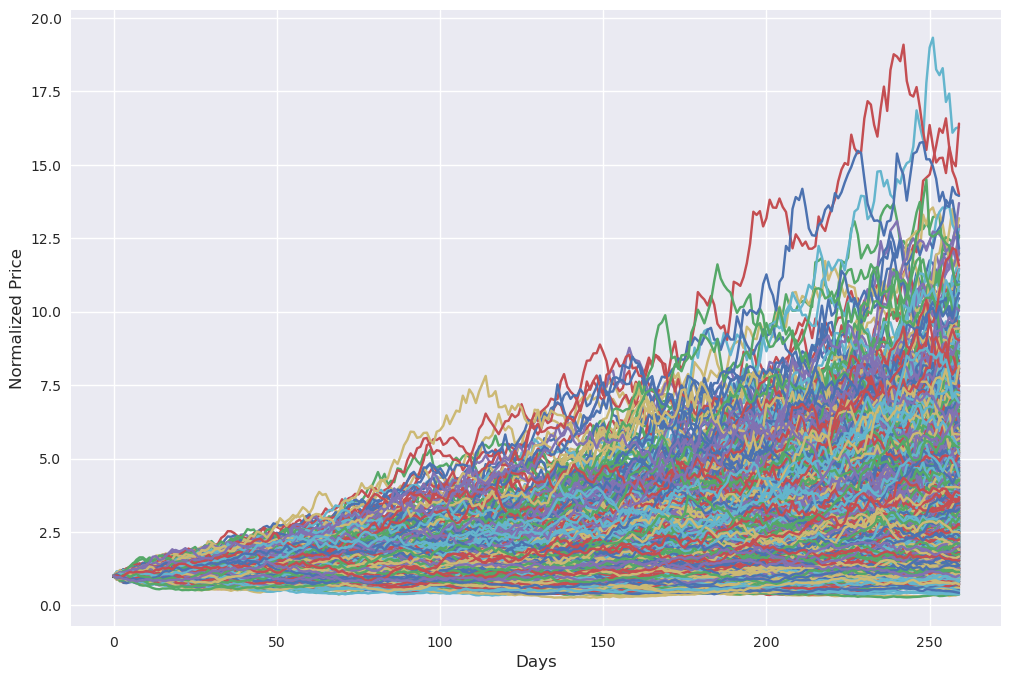

In [88]:
plt.figure(figsize = (12 ,8))
plt.plot(df.values)
plt.xlabel("Days", fontsize = 12)
plt.ylabel("Normalized Price", fontsize = 12)
plt.show()

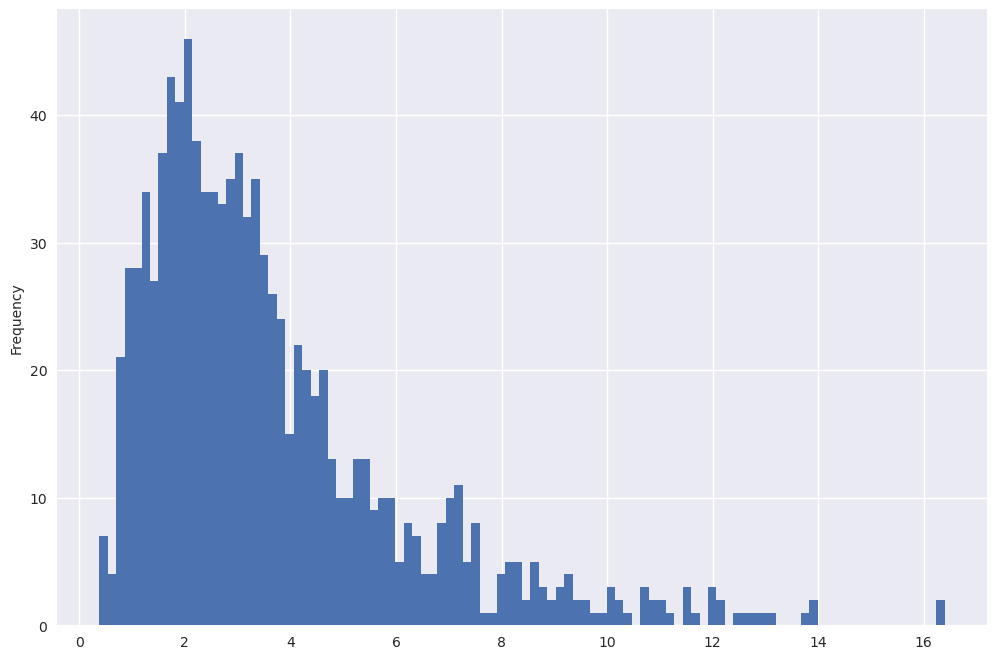

In [89]:
df.iloc[-1].plot(kind = "hist", bins = 100, figsize = (12, 8)) # final multiple after 1 year
plt.show()

In [90]:
df.iloc[-1].describe()

count   1,000.000
mean        3.629
std         2.496
min         0.378
25%         1.910
50%         2.978
75%         4.550
max        16.399
Name: 259, dtype: float64

In [91]:
np.percentile(df.iloc[-1], [10, 90])

array([1.2374534 , 7.04113117])

**NOTE:** this assumes returns are normally distributed, but in reality there is a bit more weight in the tails.

Also, we've ignored annual taxes and monthly income distribution so far.